In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
from PIL import Image
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [ ]:
def load_labels_1_train():
    datasets_dir = "../Datasets/cartoon_set/"
    img_dir = "img/"
    labels_filename = "labels.csv"

    df = pd.read_csv(datasets_dir + labels_filename, sep = "\t")
    df["img_dir"] = datasets_dir + img_dir + df["file_name"]
    
    # df["eye_color"] = df["eye_color"]/4

    df = df[["img_dir", "eye_color"]]
    print(df.head())
    return df

def load_labels_1_test():
    datasets_dir = "../Datasets/cartoon_set_test/"
    img_dir = "img/"
    labels_filename = "labels.csv"

    df = pd.read_csv(datasets_dir + labels_filename, sep = "\t")
    df["img_dir"] = datasets_dir + img_dir + df["file_name"]
    
    # df["eye_color"] = df["eye_color"]/4

    df = df[["img_dir", "eye_color"]]
    print(df.head())
    return df

In [ ]:
labels_train = load_labels_1_train()

In [ ]:
labels_test = load_labels_1_test()

In [ ]:
eye_color_dict = {0:'Brown', 1:'Blue', 2:'Green', 3:'Grey', 4:'Black'}

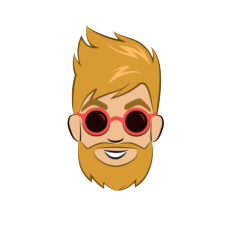

In [ ]:
img = Image.open(labels_train['img_dir'][0])
plt.axis('off')
plt.imshow(img);

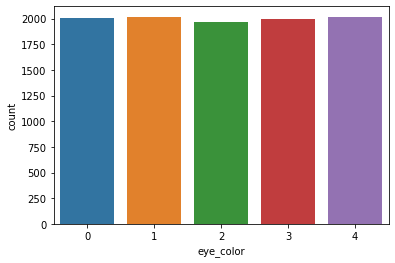

In [10]:
sns.countplot(labels_train['eye_color']);

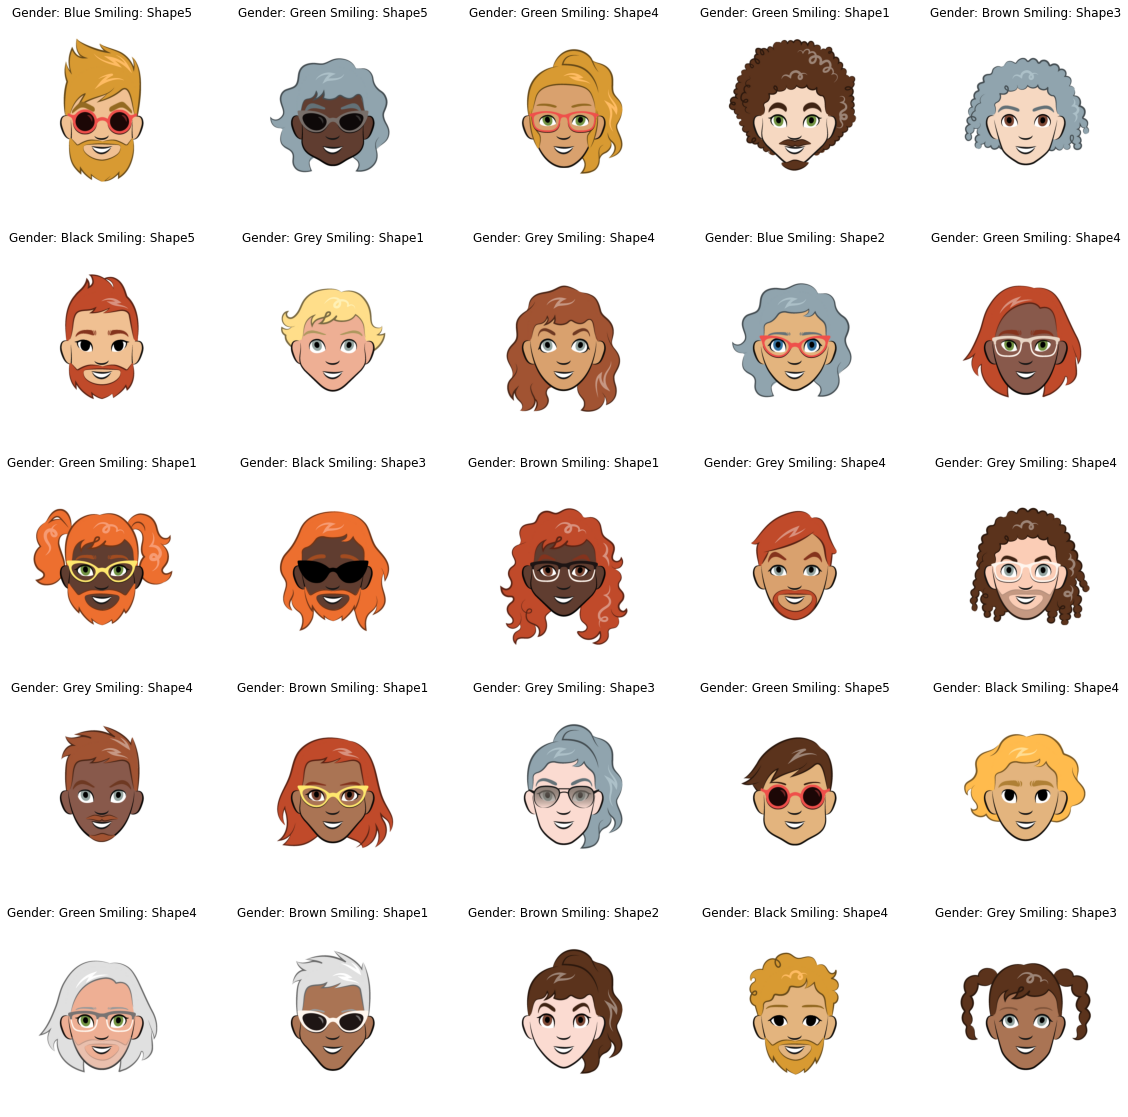

In [13]:
plt.figure(figsize=(20, 20))
files = labels_train.iloc[0:25]

for index, file, eye_color in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Gender: {eye_color_dict[eye_color]}")
    plt.axis('off')

https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-filters
- downsizing

In [14]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image)
        img = img.resize((128, 128), Image.LANCZOS)
        # img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    # features = features.reshape(len(features), 128, 128, 3)
    return features

In [15]:
x_train = extract_features(labels_train['img_dir'])

  0%|          | 0/10000 [00:00<?, ?it/s]

In [16]:
x_train.shape

(10000, 128, 128, 3)

In [17]:
x_train = x_train/255.0

In [18]:
y_train = np.array(labels_train['eye_color'])

In [19]:
input_shape = (128, 128, 3)

In [48]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)

flatten = Flatten() (maxp_3)

# fully connected layers
dense = Dense(256, activation='relu') (flatten)

dropout = Dropout(0.3) (dense)

outputs = Dense(5, activation='softmax', name='eye_color_out') (dropout)

model = Model(inputs=[inputs], outputs=[outputs])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

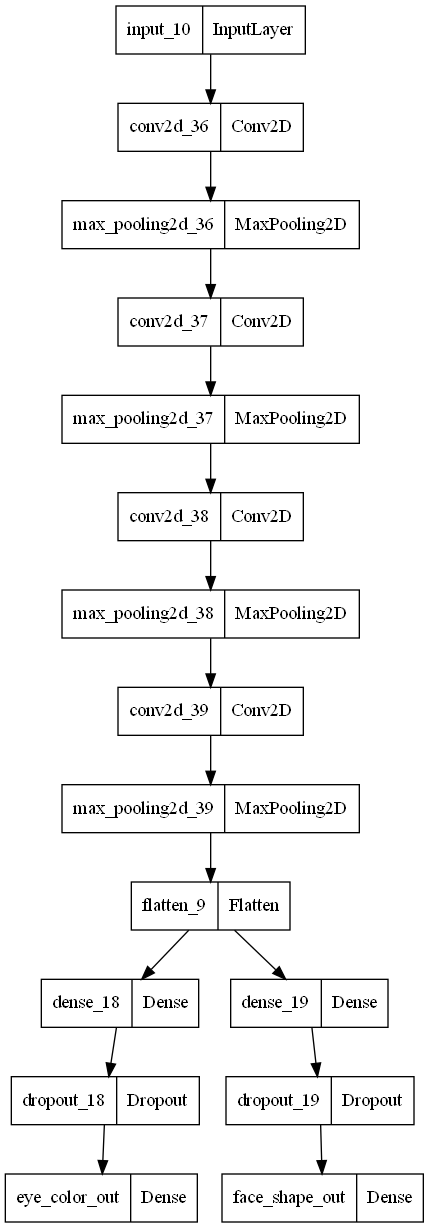

In [44]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [49]:
history = model.fit(x=x_train, y=y_train, batch_size=50, epochs=20, validation_split=0.2)

Epoch 1/20
160/160 [==============================] - 185s 1s/step - loss: 2.8352 - eye_color_out_loss: 1.2194 - face_shape_out_loss: 1.6159 - eye_color_out_accuracy: 0.4314 - face_shape_out_accuracy: 0.1926 - val_loss: 2.2814 - val_eye_color_out_loss: 0.6690 - val_face_shape_out_loss: 1.6123 - val_eye_color_out_accuracy: 0.6840 - val_face_shape_out_accuracy: 0.2060
Epoch 2/20
160/160 [==============================] - 190s 1s/step - loss: 2.0975 - eye_color_out_loss: 0.4868 - face_shape_out_loss: 1.6106 - eye_color_out_accuracy: 0.7946 - face_shape_out_accuracy: 0.2030 - val_loss: 1.9398 - val_eye_color_out_loss: 0.3298 - val_face_shape_out_loss: 1.6100 - val_eye_color_out_accuracy: 0.8410 - val_face_shape_out_accuracy: 0.1925
Epoch 3/20
160/160 [==============================] - 195s 1s/step - loss: 1.9567 - eye_color_out_loss: 0.3502 - face_shape_out_loss: 1.6065 - eye_color_out_accuracy: 0.8359 - face_shape_out_accuracy: 0.2159 - val_loss: 1.8990 - val_eye_color_out_loss: 0.3074 - 

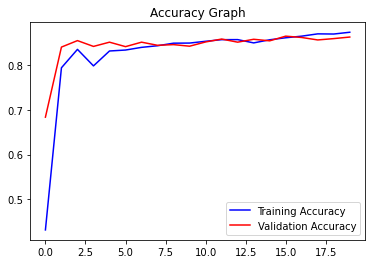

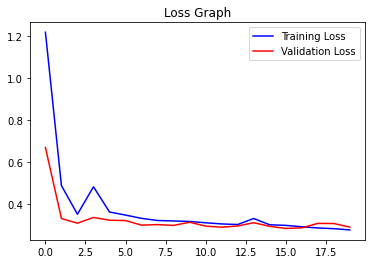

In [50]:
# plot results for gender
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [54]:
x_test = extract_features(labels_test['img_dir'])

  0%|          | 0/2500 [00:00<?, ?it/s]

Original Eye Color: Green , Original Face Shape: Shape4
1/1 [==============================] - 0s 33ms/step
Predicted Eye Color: Blue , Predicted Face Shape: Shape1


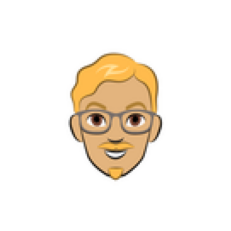

In [59]:
img_index = 0
print("Original Eye Color:", eye_color_dict[y_train[img_index]])
# predict from model
pred = model.predict(x_test[img_index].reshape(1, 128, 128, 3))
pred_eye_color = eye_color_dict[round(pred[0][0])]
print("Predicted Eye Color:", pred_eye_color)
plt.axis('off')
plt.imshow(x_test[img_index].reshape(128, 128, 3), cmap='gray');

In [63]:
y_test = np.array(labels_test['eye_color'])

In [64]:
results = model.evaluate(x = x_test, y = y_test, batch_size=100)

25/25 [==============================] - 11s 426ms/step - loss: 21.4940 - eye_color_out_loss: 20.0647 - face_shape_out_loss: 1.4293 - eye_color_out_accuracy: 0.8456 - face_shape_out_accuracy: 0.9968
